**Цель блокнота - показать, как можно сконструировать портфельную моментум-стратегию, варьировать параметры и визуализировать результаты.** 

# Данные для Momentum

**Какие данные потребуются?**

1) Для непосредственного построения стратегии используются только данные по ценам закрытия по всем торгуемым инструментам с тестируемого рынка. Мы использовали csv-файл c месячными ценами закрытия.

2) *(опционально)* Ценовой ряд с данными бенчмарка. Библиотека pqr позволяет конструировать собственные бенчмарки на основе загруженной выборки акций. Также можно загрузить и любой другой внешний бенчмарк. Формат и длина периода должны соответствовать данным из пункта 1.

3) *(опционально)* Данные с объемом торгов в валюте для тех же акций и за тот же период, что и в файле с ценами. Используются для дополнительной фильтрации неликвидных акций.

Пример файла с ценами акций. Сохранене в .xlsx для наглядности:

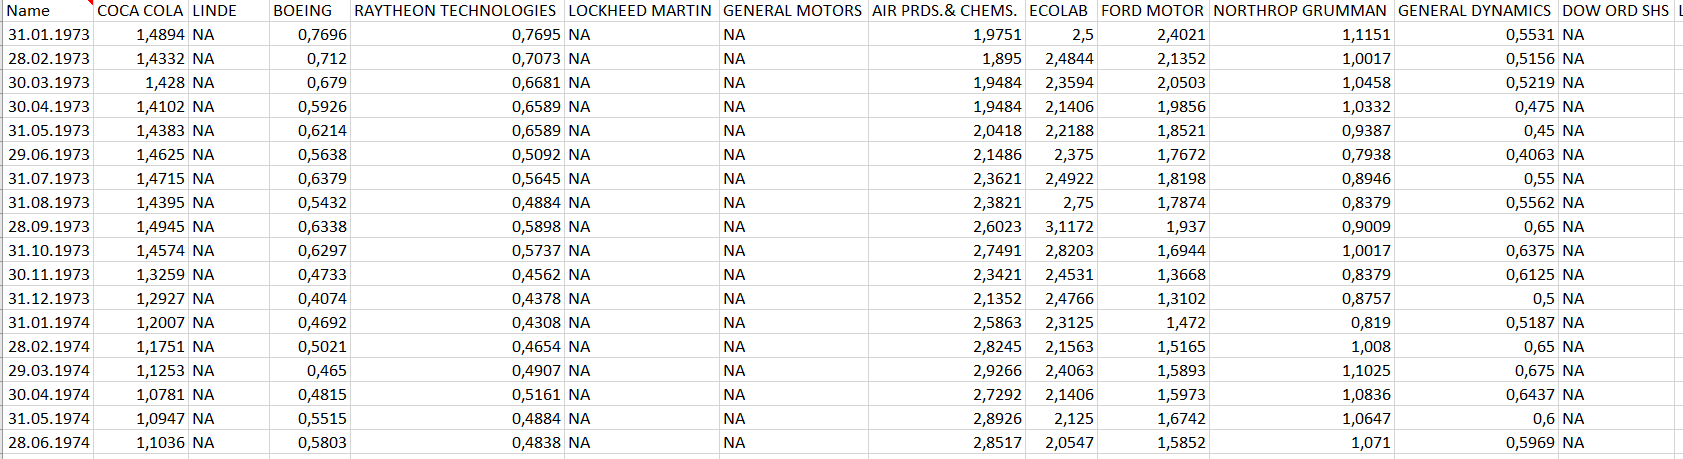

Ряд с данными бенчмарка в том же формате:

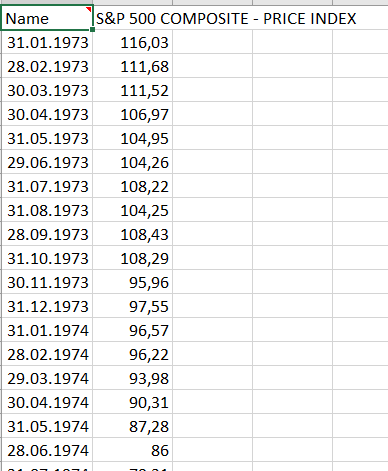

# 1 - Импорт библиотек

Загружаем стандартные библиотеки для работы с данными - pandas, numpy. Для визуализации - matplotlib. Для построения стратегий - pqr.

In [1]:
#!pip uninstall pqr -y

In [2]:
#!pip install pqr==0.4.1

In [3]:
import pqr

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# %matplotlib inline
plt.rcParams['figure.figsize'] = (16, 9)

import warnings
warnings.filterwarnings('ignore')

Убедитесь, что установленные библиотеки не ниже следующих версий:

pqr - 0.4.1

pandas - 1.4.1

numpy - 1.21.0

matplotlib - 3.4.2

Проверить версии (только в Jupyter) можно следующим способом:

In [4]:
from importlib.metadata import version
version('pqr')

'0.4.1'

In [5]:
import os; os.chdir("..")
os.chdir('C:/Users/tomtosov/Desktop/data/countries_data/countries_data/csv/russia')

# 2 - Загрузка и предобработка данных

Загружаем файл с ценами закрытия американских акций. Первый столбец с датами - индекс наших таблиц.

In [6]:
prices = pd.read_csv("close_price.csv", parse_dates=True, index_col=0)["2003":]
prices

,ABRAU DYURSO,ACRON,AEROFLOT RUSS.AIRL.,AESSEL TRADING INDUSTRIA L GROUP,AGAVA RESOURCE DEAD,AKB AVANGARD,ALOR BANK,ALROSA,ALROSA-NYURBA,AMO ZIL,...,YAKUTGAZPROM,YAKUTSKENERGO,YARASLAVT TIREPONT DEAD,YENISEI TRTL.GNRT.CO. DEAD,YUNIPRO,YUZHURALNICKEL,ZAVOD DIOD AO,ZAVOLZHSKY MOTOR PLANT DEAD,ZOLOTO YAKUTII DEAD,ZVEZDA
Name,,,,,,,,,,,,,,,,,,,,,
2003-01-31,NaN,NaN,10.97,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,119.58,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2003-02-28,NaN,NaN,11.16,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2003-03-31,NaN,NaN,10.93,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.2519
2003-04-30,NaN,NaN,10.50,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2003-05-30,NaN,NaN,11.90,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,111.52,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-04-30,202.0,5982.0,64.54,NaN,NaN,1125.0,59.5,108.97,65800.0,3730.0,...,114.00,0.436,NaN,NaN,2.872,9570.0,7.23,NaN,NaN,4.1900
2021-05-31,199.5,6050.0,70.06,NaN,NaN,NaN,64.5,117.20,65400.0,3650.0,...,109.65,0.434,NaN,NaN,2.895,9140.0,8.34,NaN,NaN,4.1600
2021-06-30,200.0,5932.0,68.60,NaN,NaN,1120.0,64.0,133.74,NaN,4045.0,...,102.00,0.415,NaN,NaN,2.757,9150.0,10.13,NaN,NaN,4.0450


'close_price.csv' - название файла;

index_col=0 - первый столбец с датами назначаем индексом. В дальнейшем, по нему можно обращаться для поиска периодов;

parse_dates=True - поиск стандартных форматов записи дат.

In [7]:
volume = pd.read_csv("trading_volume.csv", parse_dates=True, index_col=0)["2003":]
volume = prices * volume * 1000
volume

,ABRAU DYURSO,ACRON,AEROFLOT RUSS.AIRL.,AESSEL TRADING INDUSTRIA L GROUP,AGAVA RESOURCE DEAD,AKB AVANGARD,ALOR BANK,ALROSA,ALROSA-NYURBA,AMO ZIL,...,YAKUTGAZPROM,YAKUTSKENERGO,YARASLAVT TIREPONT DEAD,YENISEI TRTL.GNRT.CO. DEAD,YUNIPRO,YUZHURALNICKEL,ZAVOD DIOD AO,ZAVOLZHSKY MOTOR PLANT DEAD,ZOLOTO YAKUTII DEAD,ZVEZDA
Name,,,,,,,,,,,,,,,,,,,,,
2003-01-31,NaN,NaN,1.155690e+07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,38134062.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2003-02-28,NaN,NaN,1.720202e+07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2003-03-31,NaN,NaN,2.364159e+07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2003-04-30,NaN,NaN,2.250045e+07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2003-05-30,NaN,NaN,3.252508e+07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,736032.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-04-30,135461200.0,321831600.0,2.094519e+10,NaN,NaN,16425000.0,5158650.0,1.387523e+11,131600000.0,133161000.0,...,39546600.0,7604145.2,NaN,NaN,3.155498e+09,22011000.0,38753523.0,NaN,NaN,6217960.0
2021-05-31,111420750.0,317625000.0,2.313806e+10,NaN,NaN,NaN,6275850.0,1.135128e+11,13080000.0,36500000.0,...,32730525.0,2784457.2,NaN,NaN,2.733903e+09,11882000.0,63192180.0,NaN,NaN,1822080.0
2021-06-30,105360000.0,245584800.0,2.673815e+10,NaN,NaN,3584000.0,2784000.0,2.033067e+11,NaN,81709000.0,...,30549000.0,2199458.5,NaN,NaN,3.632899e+09,43005000.0,176288338.0,NaN,NaN,2714195.0


In [8]:
prices, volume = pqr.utils.align(prices, volume)

In [9]:
prices, volume = pqr.utils.replace_with_nan(prices, volume, to_replace=0)

Мы предполагаем, что нулевые цены и объем торгов по американских акциям - это отсутствующие значения. Поэтому мы заменяем все нулевые значения на NaN. Во многих других случаях это оправданно, но если вы работаете с дамми-переменными для построения стратегии, то этого делать не стоит.

In [10]:
universe = volume >= 21_000_000 # матрицы одинаковые, поэтому можно
universe

,ABRAU DYURSO,ACRON,AEROFLOT RUSS.AIRL.,AESSEL TRADING INDUSTRIA L GROUP,AGAVA RESOURCE DEAD,AKB AVANGARD,ALOR BANK,ALROSA,ALROSA-NYURBA,AMO ZIL,...,YAKUTGAZPROM,YAKUTSKENERGO,YARASLAVT TIREPONT DEAD,YENISEI TRTL.GNRT.CO. DEAD,YUNIPRO,YUZHURALNICKEL,ZAVOD DIOD AO,ZAVOLZHSKY MOTOR PLANT DEAD,ZOLOTO YAKUTII DEAD,ZVEZDA
Name,,,,,,,,,,,,,,,,,,,,,
2003-01-31,False,False,False,False,False,False,False,False,False,False,...,False,False,True,False,False,False,False,False,False,False
2003-02-28,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2003-03-31,False,False,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2003-04-30,False,False,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2003-05-30,False,False,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-04-30,True,True,True,False,False,False,False,True,True,True,...,True,False,False,False,True,True,True,False,False,False
2021-05-31,True,True,True,False,False,False,False,True,False,True,...,True,False,False,False,True,False,True,False,False,False
2021-06-30,True,True,True,False,False,False,False,True,False,True,...,True,False,False,False,True,True,True,False,False,False


Таблица для отслеживания доходности портфеля

In [11]:
returns_calculator = pqr.utils.partial(
    pqr.calculate_returns, 
    universe_returns=pqr.prices_to_returns(prices),
)

Бенчмарк на основе выборки

In [12]:
ew_benchmark = pqr.Benchmark.from_universe(
    universe=universe,
    allocator=pqr.equal_weights, # способ задания весов в бенчмарке
    calculator=returns_calculator,
    name='EW_Benchmark'
)

ew_benchmark.returns

EW_Benchmark
2003-01-31    0.000000
2003-02-28    0.099379
2003-03-31   -0.042409
2003-04-30    0.095828
2003-05-30    0.020178
                ...   
2021-04-30    0.007293
2021-05-31    0.021151
2021-06-30   -0.008828
2021-07-30   -0.006132
2021-08-31    0.073559
Length: 224, dtype: float64

Бенчмарк на основе внешнего индекса (ряда)

In [13]:
imoex = pd.read_excel('imoex.xlsx', index_col=0, parse_dates=True)['MOEX RUSSIA INDEX - PRICE INDEX']['2003':]

imoex_benchmark = pqr.Benchmark.from_index(
    index=imoex,
    name='IMOEX'
)

imoex_benchmark.returns

IMOEX
2003-01-31    0.000000
2003-02-28    0.109624
2003-03-31   -0.046732
2003-04-30    0.135797
2003-05-30    0.138762
                ...   
2021-04-30    0.000644
2021-05-31    0.050121
2021-06-30    0.032303
2021-07-30   -0.018291
2021-08-31    0.039076
Name: MOEX RUSSIA INDEX - PRICE INDEX, Length: 224, dtype: float64

# Метрики

Дашборд по сути показывает нам основные метрики. При этом у нас есть 2 вида метрик: числовые и time-series. Числовая метрика очевидно возвращает просто число, а ts-метрика - временной ряд. Отсюда и различия в том, как мы их можем отображать: числовые можем показать табличкой, а ts-метрики - графиком. Собирать таблицы и рисовать графики мы можем и руками, но это муторная и бесполезная рутина, потому что в библиотеке есть для этого функции.

Для числовых метрик - pqr.metrics.Table, которая принимает на вход список портфелей и словарь с метриками, где ключ это имя метрики, а значение - функция, которая при применении к портфелю выдает число. При этом метрика может требовать не только портфель, но и дополнительные обязательные параметры (например, для расчета альфы надо еще и бенчмарк знать), поэтому мы вынуждены пользоваться pqr.utils.partial, чтобы фиксировать эти "гиперпараметров".

Для ts-метрик - pqr.metrics.plot_chart. Логика там точно такая же - принимаем на вход список портфелей и словарь с метриками, опять же фиксируем "гиперпараметры" через pqr.utils.partial. При 

In [14]:
table = pqr.metrics.Table()

table

Table(metrics={})

# Поочередер добавляем нужные метрики

In [15]:
table.add_metric(
    pqr.utils.partial(
        pqr.metrics.mean_return,
        statistics=True,
        annualizer=12,
    ), # type: ignore
    multiplier=100,
    name="Monthly Mean Return, %",
)

In [16]:
table

Table(metrics={'Monthly Mean Return, %': <function Table.add_metric.<locals>.displayable_metric at 0x0000021C70BAA820>})

In [17]:
table.add_metric(
    pqr.utils.partial(
        pqr.metrics.volatility,
        annualizer=12,
    ), # type: ignore
    multiplier=100,
    name="Monthly Volatility, %",
)

In [18]:
table.add_metric(
    pqr.utils.partial(
        pqr.metrics.alpha,
        statistics=True,
        benchmark=ew_benchmark,
        annualizer=12,
    ), # type: ignore
    multiplier=100,
    name="Alpha, %",
)

График

In [19]:
fig = pqr.metrics.Figure(
    pqr.metrics.compounded_returns,
    name="Compounded Returns",
    benchmark=ew_benchmark,
    log_scale=False,
)

fig

Figure(metric=<function compounded_returns at 0x0000021C6F564700>, multiplier=1.0, name='Compounded Returns', benchmark=Benchmark(name='EW_Benchmark'), log_scale=False, kwargs={})

In [20]:
summary = pqr.metrics.Dashboard([table, fig])
summary

Dashboard(items=[Table(metrics={'Monthly Mean Return, %': <function Table.add_metric.<locals>.displayable_metric at 0x0000021C70BAA820>, 'Monthly Volatility, %': <function Table.add_metric.<locals>.displayable_metric at 0x0000021C6F5DBC10>, 'Alpha, %': <function Table.add_metric.<locals>.displayable_metric at 0x0000021C70BFF670>}), Figure(metric=<function compounded_returns at 0x0000021C6F564700>, multiplier=1.0, name='Compounded Returns', benchmark=Benchmark(name='EW_Benchmark'), log_scale=False, kwargs={})])

# Собираем фактор Моментум из цен

In [21]:
dynamic_transform = pqr.utils.compose(
    pqr.utils.partial(pqr.factors.filter, universe=universe),
    pqr.utils.partial(pqr.factors.look_back_pct_change, period=3),
    pqr.utils.partial(pqr.factors.lag, period=1),
    pqr.utils.partial(pqr.factors.hold, period=3),
)

В скобках dynamic_transform() находится DataFrame с фактором, на основе которого мы создаем фактор;

filter(universe=prices > 5) - акции с ценой ниже 5 долларов не участвуют в формировании портфелей (принимают NaN значение);

look_back_pct_change(3) - динамичный расчет фактора на основе изменения к периоду t-3;

lag(1) - не используем лаг между наблюдением и формированием портфеля;

hold(3) - удержание позиций 3 месяца.

In [22]:
prices

,ABRAU DYURSO,ACRON,AEROFLOT RUSS.AIRL.,AESSEL TRADING INDUSTRIA L GROUP,AGAVA RESOURCE DEAD,AKB AVANGARD,ALOR BANK,ALROSA,ALROSA-NYURBA,AMO ZIL,...,YAKUTGAZPROM,YAKUTSKENERGO,YARASLAVT TIREPONT DEAD,YENISEI TRTL.GNRT.CO. DEAD,YUNIPRO,YUZHURALNICKEL,ZAVOD DIOD AO,ZAVOLZHSKY MOTOR PLANT DEAD,ZOLOTO YAKUTII DEAD,ZVEZDA
Name,,,,,,,,,,,,,,,,,,,,,
2003-01-31,NaN,NaN,10.97,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,119.58,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2003-02-28,NaN,NaN,11.16,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2003-03-31,NaN,NaN,10.93,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.2519
2003-04-30,NaN,NaN,10.50,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2003-05-30,NaN,NaN,11.90,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,111.52,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-04-30,202.0,5982.0,64.54,NaN,NaN,1125.0,59.5,108.97,65800.0,3730.0,...,114.00,0.436,NaN,NaN,2.872,9570.0,7.23,NaN,NaN,4.1900
2021-05-31,199.5,6050.0,70.06,NaN,NaN,NaN,64.5,117.20,65400.0,3650.0,...,109.65,0.434,NaN,NaN,2.895,9140.0,8.34,NaN,NaN,4.1600
2021-06-30,200.0,5932.0,68.60,NaN,NaN,1120.0,64.0,133.74,NaN,4045.0,...,102.00,0.415,NaN,NaN,2.757,9150.0,10.13,NaN,NaN,4.0450


In [23]:
momentum = dynamic_transform(prices)
momentum

,ABRAU DYURSO,ACRON,AEROFLOT RUSS.AIRL.,AESSEL TRADING INDUSTRIA L GROUP,AGAVA RESOURCE DEAD,AKB AVANGARD,ALOR BANK,ALROSA,ALROSA-NYURBA,AMO ZIL,...,YAKUTGAZPROM,YAKUTSKENERGO,YARASLAVT TIREPONT DEAD,YENISEI TRTL.GNRT.CO. DEAD,YUNIPRO,YUZHURALNICKEL,ZAVOD DIOD AO,ZAVOLZHSKY MOTOR PLANT DEAD,ZOLOTO YAKUTII DEAD,ZVEZDA
Name,,,,,,,,,,,,,,,,,,,,,
2003-05-30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2003-06-30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2003-07-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2003-08-29,NaN,NaN,0.057143,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2003-09-30,NaN,NaN,0.057143,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-04-30,0.047368,-0.038667,0.219546,NaN,NaN,NaN,NaN,0.402403,0.092857,NaN,...,0.236236,NaN,NaN,NaN,0.091120,0.763636,NaN,NaN,NaN,NaN
2021-05-31,0.015075,-0.021910,-0.076417,NaN,NaN,NaN,NaN,0.098266,0.075163,0.174803,...,0.846154,NaN,NaN,NaN,0.016277,-0.103093,0.001385,NaN,NaN,NaN
2021-06-30,0.015075,-0.021910,-0.076417,NaN,NaN,NaN,NaN,0.098266,0.075163,0.174803,...,0.846154,NaN,NaN,NaN,0.016277,-0.103093,0.001385,NaN,NaN,NaN


# Собираем портфели из фактора Моментум

Теперь поработаем над дизайном самой стратегии:

1) factor - это таблица с фактором для принятия решений (для моментума это цены);

2) "better" также принимает всего два значения - "more" и "less". Если мы выберем more, то в портфель победителей попадут акции с наибольшим ростом цены, в портфель p2 акции из следующего квантиля по динамике цен. И так по убывающей до портфеля losers. Если мы выберем less, то все будет наоборот. Выбирайте метод исходя из экономического смысла.

3) quantiles определяет, сколько портфелей будет построено из исходной выборки. Мы выбрали 5 квантилей. Соответственно, каждый будет содержать в себе по 20% доступных для покупки акций на каждый период;

4) add_wml - включение арбитражного (Winners Minus Losers) портфеля из покупки победителей и шорта по проигравшим;

5) allocator - способ задания весов. При =None и по умолчанию задаются равные веса. При задании других весов (например, по mcap) используйте подготовленный фактор без отрицательных значений. Пример в блокноте value.ipynb;

In [24]:
momentum_portfolios = pqr.factors.backtest_factor_portfolios(
    factor=momentum, # на основе чего принимаем решения (матрица или таблица)
    strategies=pqr.factors.split_quantiles(4, better='more'), # больще лучше
    allocator=pqr.equal_weights,
    calculator=returns_calculator,
    add_wml=True,
)

In [25]:
momentum_portfolios

[Portfolio(name='Winners'),
 Portfolio(name='Neutral 1'),
 Portfolio(name='Neutral 2'),
 Portfolio(name='Losers'),
 Portfolio(name='WML')]

In [26]:
(momentum_portfolios[0].holdings>0).sum(axis=0).sort_values(ascending=False).head(15)

AEROFLOT RUSS.AIRL.         72
MMC NORILSK NICKEL          69
NOVATEK                     67
POLYUS                      63
GAZPROM NEFT                58
RASPADSKAYA                 58
SISTEMA JSFC                57
MAGNIT                      54
NOVOLIPETSK STEEL           54
MAGNITOGORSK IOSTL.WORKS    54
NK LUKOIL                   52
TATNEFT                     51
SEVERSTAL                   51
ACRON                       51
INTER RAO EES               48
dtype: int64

,Winners,Neutral 1,Neutral 2,Losers,WML
"Monthly Mean Return, %",21.37*** (3.64),18.09*** (2.87),9.79* (1.48),10.90* (1.59),10.47** (2.25)
"Monthly Volatility, %",25.16,27.00,28.36,29.28,19.91
"Alpha, %",8.45*** (2.95),3.36 (1.45),-5.65** (-2.29),-4.39 (-1.40),12.84*** (2.77)


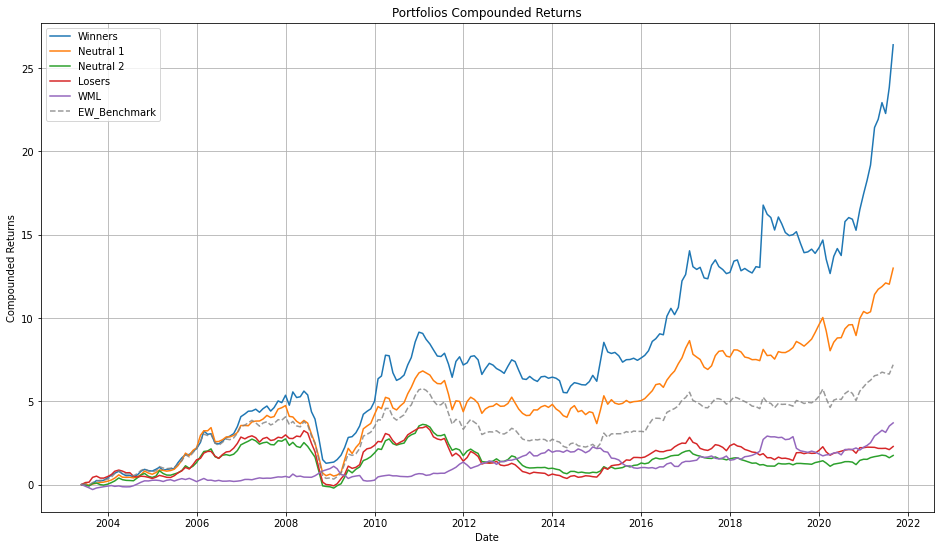

In [27]:
summary.display(momentum_portfolios)

# Reversal

In [28]:
reversal_dynamic_transform = pqr.utils.compose(
    pqr.utils.partial(pqr.factors.filter, universe=universe),
    pqr.utils.partial(pqr.factors.look_back_pct_change, period=1),
    pqr.utils.partial(pqr.factors.lag, period=1),
    pqr.utils.partial(pqr.factors.hold, period=1),
)

In [29]:
reversal = reversal_dynamic_transform(prices)
reversal

,ABRAU DYURSO,ACRON,AEROFLOT RUSS.AIRL.,AESSEL TRADING INDUSTRIA L GROUP,AGAVA RESOURCE DEAD,AKB AVANGARD,ALOR BANK,ALROSA,ALROSA-NYURBA,AMO ZIL,...,YAKUTGAZPROM,YAKUTSKENERGO,YARASLAVT TIREPONT DEAD,YENISEI TRTL.GNRT.CO. DEAD,YUNIPRO,YUZHURALNICKEL,ZAVOD DIOD AO,ZAVOLZHSKY MOTOR PLANT DEAD,ZOLOTO YAKUTII DEAD,ZVEZDA
Name,,,,,,,,,,,,,,,,,,,,,
2003-03-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2003-04-30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2003-05-30,NaN,NaN,-0.039341,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2003-06-30,NaN,NaN,0.133333,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2003-07-31,NaN,NaN,-0.075630,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-04-30,0.041872,0.036060,-0.031869,NaN,NaN,NaN,NaN,0.064912,0.003247,NaN,...,0.642084,NaN,NaN,NaN,0.050588,NaN,NaN,NaN,NaN,NaN
2021-05-31,-0.044917,-0.036094,-0.043001,NaN,NaN,NaN,NaN,0.028213,0.064725,NaN,...,-0.060569,NaN,NaN,NaN,-0.026111,NaN,NaN,NaN,NaN,NaN
2021-06-30,-0.012376,0.011367,0.085528,NaN,NaN,NaN,NaN,0.075525,NaN,-0.021448,...,-0.038158,NaN,NaN,NaN,0.008008,NaN,0.153527,NaN,NaN,NaN


In [30]:
reversal_portfolios = pqr.factors.backtest_factor_portfolios(
    factor=reversal, # на основе чего принимаем решения (матрица или таблица)
    strategies=pqr.factors.split_quantiles(4, better='less'), # меньше лучше
    allocator=pqr.equal_weights,
    calculator=returns_calculator,
    add_wml=False,
)

,Winners,Neutral 1,Neutral 2,Losers
"Monthly Mean Return, %",9.83* (1.41),19.24*** (2.99),19.35*** (3.18),15.54*** (2.55)
"Monthly Volatility, %",30.03,27.65,26.16,26.22
"Alpha, %",-5.84* (-1.74),4.24 (1.63),5.05** (2.13),1.82 (0.63)


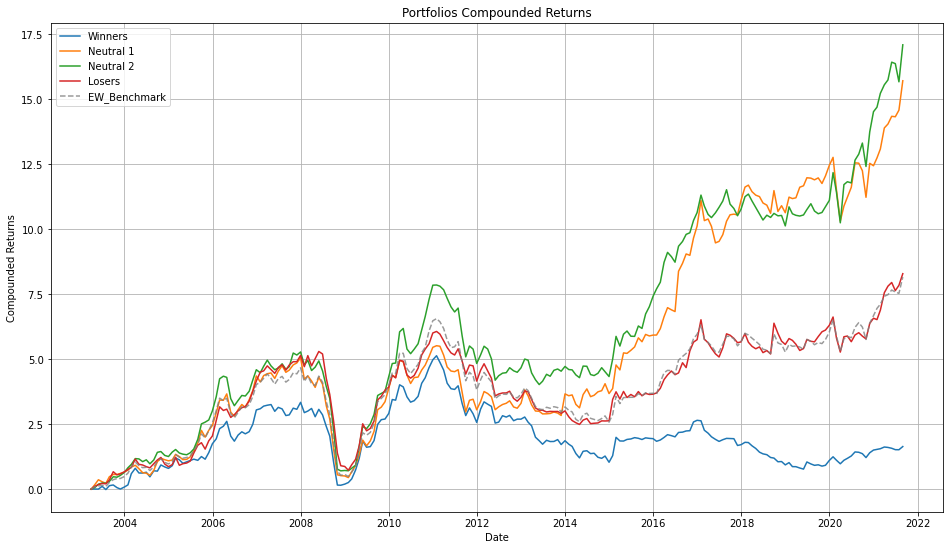

In [31]:
summary.display(reversal_portfolios)

# Проверка множества параметров

Данные готовы и можно приступать к построению первой стратегии. Сперва **ответим для себя на следующие вопросы:**

1) По логике моментума, мы должны отбирать акции с наибольшим ростом цены за предыдущий период. Какой период для принятия решений взять? 1/2/3/12 месяцев?

2) После покупки мы удерживаем позиции минимум 1 период. Но может делать такие частые ребалансировки излишне?

3) В академических исследованиях иногда говорится о целесообразности выставления лага между периодом наблюдения и покупкой. Если он нужен, то какой период достаточен?

4) Логика портфельного тестирования предполагает разделение доступной выборки на определенное количество портфелей по квантилям. Какой квантиль применить в нашем случае?

5) По какому показателю принимать решение об эффективности стратегии?

**Универсальный ответ на все пять вопросов - нужно перебирать как можно большее число параметров для поиска устойчивости.** Для 1-3 пунктов мы используем параметры перебора периодов. Для 4-5 пунктов, потребуется запуск нескольких бэктестов с таргетированием разных метрик и параметрами квантилей.

Зададим параметры перебора и выберем среднюю доходность стратегии как целевую метрику:

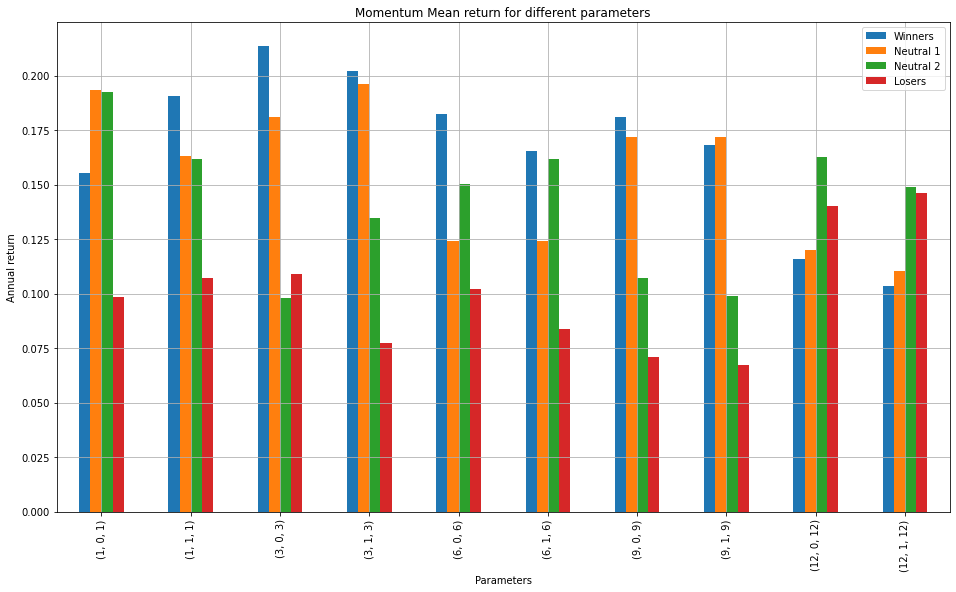

In [32]:
def mean_transform_factory(looking, lag, holding):
    return pqr.utils.compose(
        pqr.utils.partial(pqr.factors.filter, universe=universe),
        pqr.utils.partial(pqr.factors.look_back_pct_change, period=looking),
        pqr.utils.partial(pqr.factors.lag, period=lag),
        pqr.utils.partial(pqr.factors.hold, period=holding),
    )


transforms_grid_value = {
    "(1, 0, 1)": mean_transform_factory(1, 1, 1),
    "(1, 1, 1)": mean_transform_factory(1, 2, 1),
    "(3, 0, 3)": mean_transform_factory(3, 1, 3),
    "(3, 1, 3)": mean_transform_factory(3, 2, 3),
    "(6, 0, 6)": mean_transform_factory(6, 1, 6),
    "(6, 1, 6)": mean_transform_factory(6, 2, 6),
    "(9, 0, 9)": mean_transform_factory(9, 1, 9),
    "(9, 1, 9)": mean_transform_factory(9, 2, 9),
    "(12, 0, 12)": mean_transform_factory(12, 1, 12),
    "(12, 1, 12)": mean_transform_factory(12, 2, 12),
}


pqr.factors.grid_search_factor_portfolios(
    factor=prices,
    strategies=pqr.factors.split_quantiles(4, better='more'),
    transforms=transforms_grid_value,
    metric=pqr.utils.partial(
        pqr.metrics.mean_return,
        annualizer=12,
    ),
    allocator=pqr.equal_weights,
    calculator=returns_calculator,
    add_wml=False,
).plot.bar()

plt.title("Momentum Mean return for different parameters")
plt.xlabel("Parameters")
plt.ylabel("Annual return")
plt.grid()

В transforms_grid_value первая цифра в () означает период наблюдения, вторая - лаг и третья - период ожидания.

# Детальный разбор стратегии с заданными параметрами

 Теперь, когда мы видим общую картину, можем детальнее изучить метрики и динамику интересующей нас стратегии. Наилучшие результаты показала вариация портфеля 6-1-6. Ее мы и рассмотрим. Зададим фактор (!не стратегию) momentum с нужными параметрами через pqr.Factor:

In [33]:
six_month_dynamic_transform = pqr.utils.compose(
    pqr.utils.partial(pqr.factors.filter, universe=universe),
    pqr.utils.partial(pqr.factors.look_back_pct_change, period=3),
    pqr.utils.partial(pqr.factors.lag, period=1),
    pqr.utils.partial(pqr.factors.hold, period=3),
)

In [34]:
six_month_momentum = six_month_dynamic_transform(prices)

,Winners,Neutral 1,Neutral 2,Losers,WML
"Monthly Mean Return, %",21.37*** (3.64),18.09*** (2.87),9.79* (1.48),10.90* (1.59),10.47** (2.25)
"Monthly Volatility, %",25.16,27.00,28.36,29.28,19.91
"Alpha, %",8.45*** (2.95),3.36 (1.45),-5.65** (-2.29),-4.39 (-1.40),12.84*** (2.77)


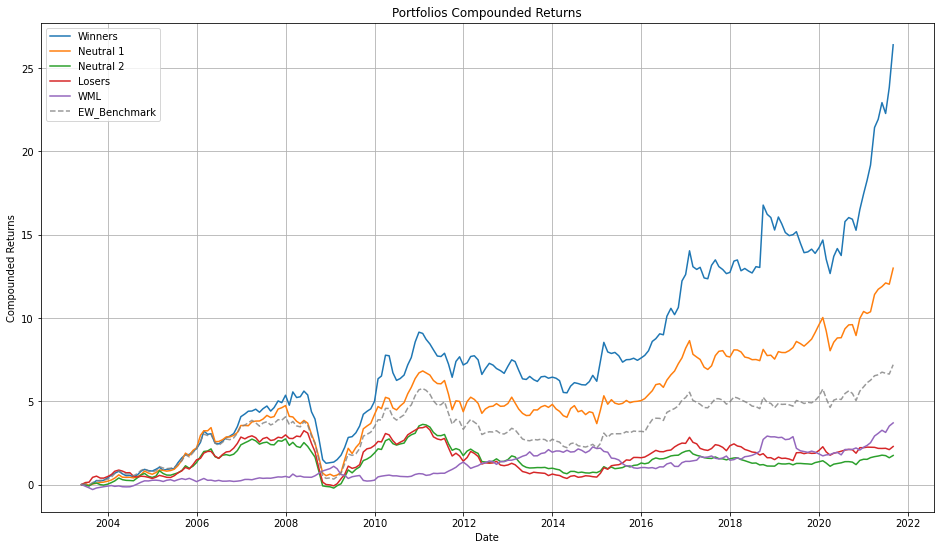

In [35]:
cs_momentum_portfolios = pqr.factors.backtest_factor_portfolios(
    factor=six_month_momentum,
    strategies=pqr.factors.split_quantiles(4, better='more'),
    allocator=pqr.equal_weights,
    calculator=returns_calculator,
    add_wml=False,
)

summary.display(momentum_portfolios)

In [36]:
cs_momentum_portfolios

[Portfolio(name='Winners'),
 Portfolio(name='Neutral 1'),
 Portfolio(name='Neutral 2'),
 Portfolio(name='Losers')]

In [37]:
cs_momentum_portfolios[0]

Portfolio(name='Winners')

In [38]:
cs_momentum_portfolios[0].returns

Winners
2003-05-30    0.000000
2003-06-30    0.024949
2003-07-31   -0.087363
2003-08-29    0.124982
2003-09-30    0.184926
                ...   
2021-04-30    0.022057
2021-05-31    0.043717
2021-06-30   -0.027266
2021-07-30    0.067305
2021-08-31    0.102860
Length: 220, dtype: float64

In [39]:
cs_momentum_portfolios[0].holdings

,ABRAU DYURSO,ACRON,AEROFLOT RUSS.AIRL.,AESSEL TRADING INDUSTRIA L GROUP,AGAVA RESOURCE DEAD,AKB AVANGARD,ALOR BANK,ALROSA,ALROSA-NYURBA,AMO ZIL,...,YAKUTGAZPROM,YAKUTSKENERGO,YARASLAVT TIREPONT DEAD,YENISEI TRTL.GNRT.CO. DEAD,YUNIPRO,YUZHURALNICKEL,ZAVOD DIOD AO,ZAVOLZHSKY MOTOR PLANT DEAD,ZOLOTO YAKUTII DEAD,ZVEZDA
Winners,,,,,,,,,,,,,,,,,,,,,
2003-05-30,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0
2003-06-30,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0
2003-07-31,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0
2003-08-29,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0
2003-09-30,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-04-30,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.045455,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.045455,0.000000,0.0,0.0,0.0
2021-05-31,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.035714,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0
2021-06-30,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.035714,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0


В словаре momentum_portfolios содержатся данные по 5 портфелям моментума + арбитражный портфель.

In [40]:
pqr.metrics.compounded_returns(cs_momentum_portfolios[0])[-1]

26.39941151913859

# 6 - Аналитика по стратегии

Как менялась альфа портфеля победителей в течение всего периода:

0.08449103183044492


<AxesSubplot:xlabel='Winners'>

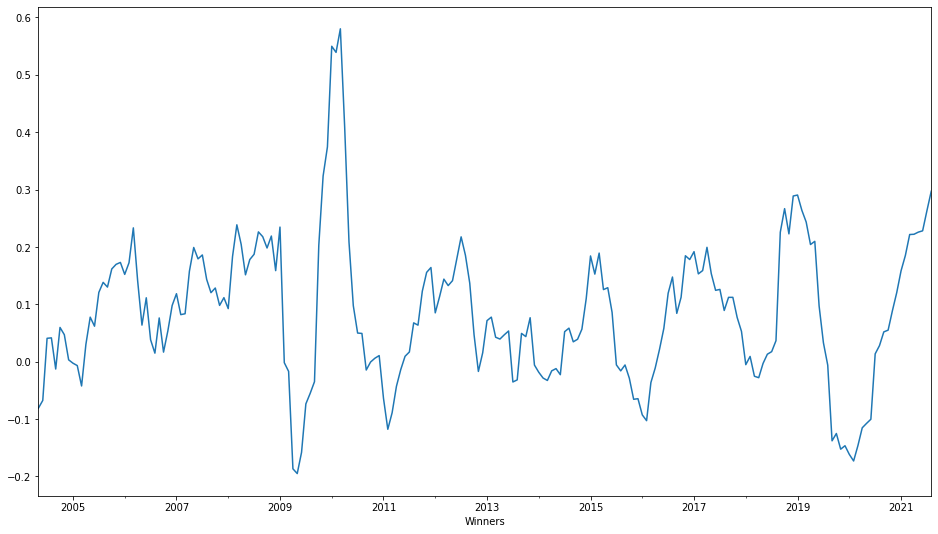

In [41]:
print(pqr.metrics.alpha(cs_momentum_portfolios[0], benchmark=ew_benchmark, annualizer=12))
pqr.metrics.trailing_alpha(cs_momentum_portfolios[0], benchmark=ew_benchmark, annualizer=12).plot()

Аналогичный график для коэффициента Шарпа:

0.8493858978600015


<AxesSubplot:xlabel='Winners'>

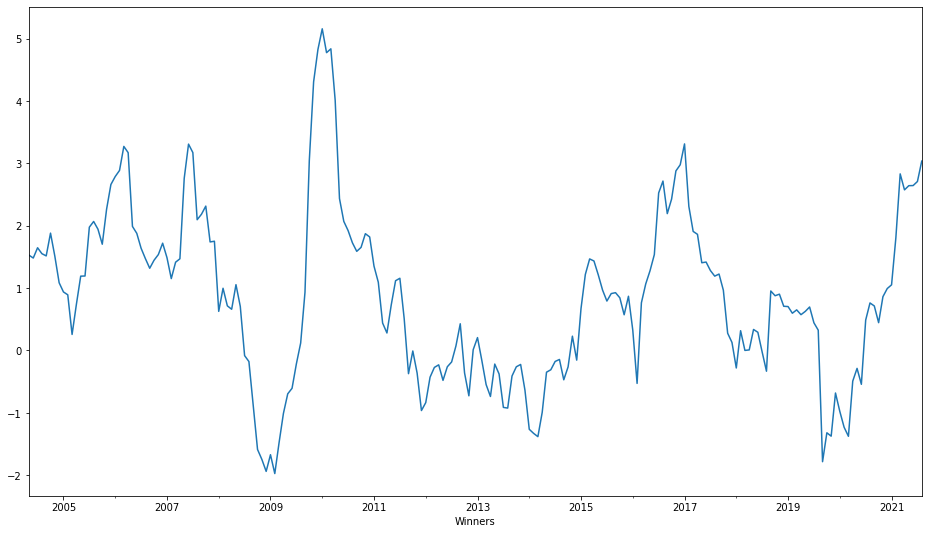

In [42]:
print(pqr.metrics.sharpe_ratio(cs_momentum_portfolios[0], annualizer=12))
pqr.metrics.trailing_sharpe_ratio(cs_momentum_portfolios[0], annualizer=12).plot()

История просадок портфеля:

<AxesSubplot:xlabel='Winners'>

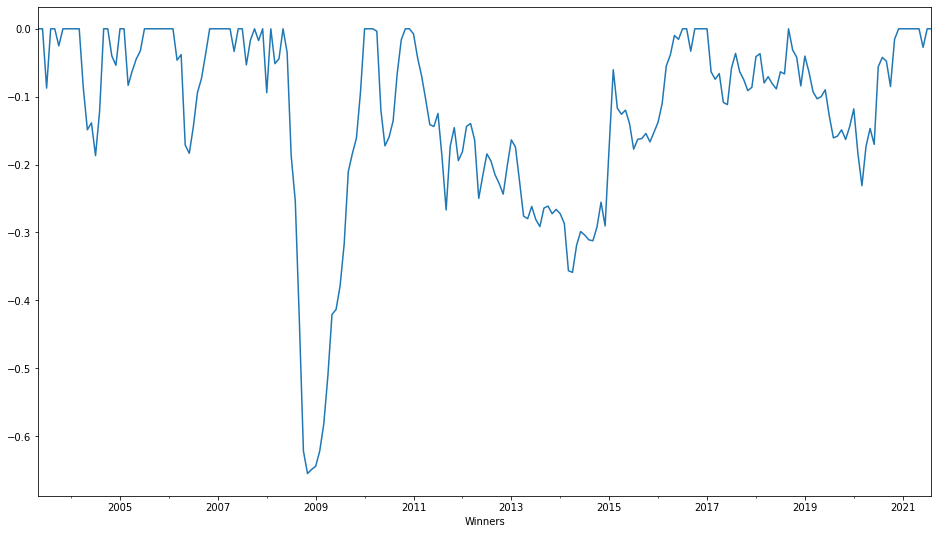

In [43]:
pqr.metrics.drawdown(cs_momentum_portfolios[0]).plot()

Также мы видим, что высокие просадки обусловлены не покупкой особо неудачных бумаг, а общим снижением прибыльных сделок до 30-40% против средние 63%:

0.5954545454545455


<AxesSubplot:xlabel='Winners'>

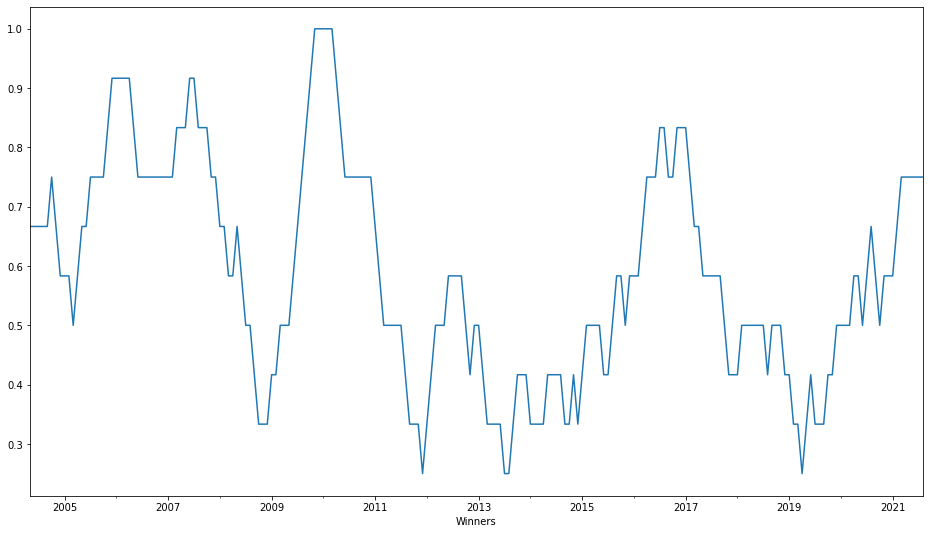

In [44]:
print(pqr.metrics.win_rate(cs_momentum_portfolios[0].returns).mean())
pqr.metrics.trailing_win_rate(cs_momentum_portfolios[0].returns).plot()

# Альтернативные способы собрать портфель

In [45]:
half_momentum_portolio = pqr.Portfolio.backtest(
    longs=pqr.factors.quantiles(six_month_momentum, min_q=0.9, max_q=1.0),
    shorts=None,
    allocator=pqr.equal_weights,
    calculator=returns_calculator,
    name="0.9_Momentum"
)

half_momentum_portolio

Portfolio(name='0.9_Momentum')

In [46]:
quarter_momentum_portolio = pqr.Portfolio.backtest(
    longs=pqr.factors.quantiles(six_month_momentum, min_q=0.8, max_q=0.9),
    shorts=None,
    allocator=pqr.equal_weights,
    calculator=returns_calculator,
    name="0.8_Momentum"
)

quarter_momentum_portolio

Portfolio(name='0.8_Momentum')

,0.8_Momentum,0.9_Momentum
"Monthly Mean Return, %",24.66*** (3.97),20.32*** (2.76)
"Monthly Volatility, %",26.56,31.50
"Alpha, %",13.18*** (3.10),6.71 (1.33)


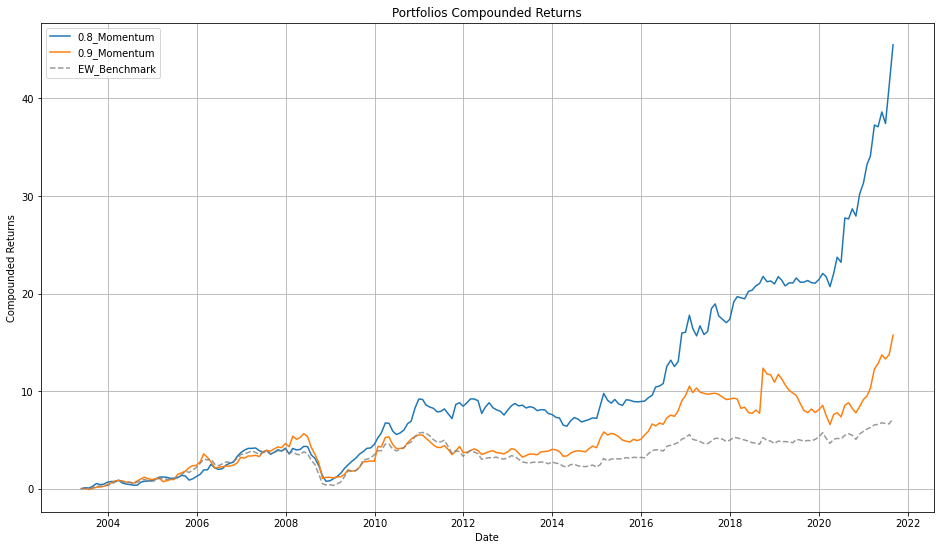

In [47]:
summary.display([quarter_momentum_portolio, half_momentum_portolio])

,Winners,Losers
"Monthly Mean Return, %",24.81*** (3.64),14.51*** (2.42)
"Monthly Volatility, %",29.15,25.66
"Alpha, %",17.07*** (2.77),-0.19 (-0.15)


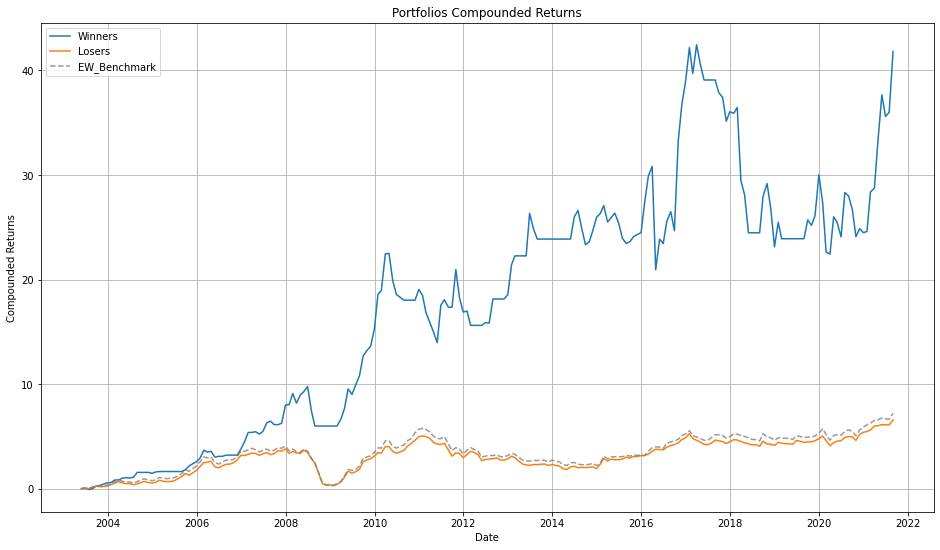

In [49]:
ts_momentum_portfolios = pqr.factors.backtest_factor_portfolios(
    factor=six_month_momentum,
    strategies=pqr.factors.split_time_series([0.5], 'more'),
    allocator=pqr.equal_weights,
    calculator=returns_calculator,
    add_wml=False,
)

summary.display(ts_momentum_portfolios)